In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [32]:
X = df[["Hours Studied", "Sleep Hours"]]
y = df["Performance Index"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("R^2", r2_score(y_test, y_pred))
print("MSE:", mse)

R^2 0.1379781739496494
MSE: 321.8929628740052


In [34]:
sleep_mean = X_test["Sleep Hours"].mean()
study_mean = X_test["Hours Studied"].mean()

In [35]:
x_vals = np.linspace(X_test["Hours Studied"].min(), X_test["Hours Studied"].max(), 100)
X_input = np.column_stack((x_vals, np.full_like(x_vals, sleep_mean)))
y_vals = model.predict(X_input)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


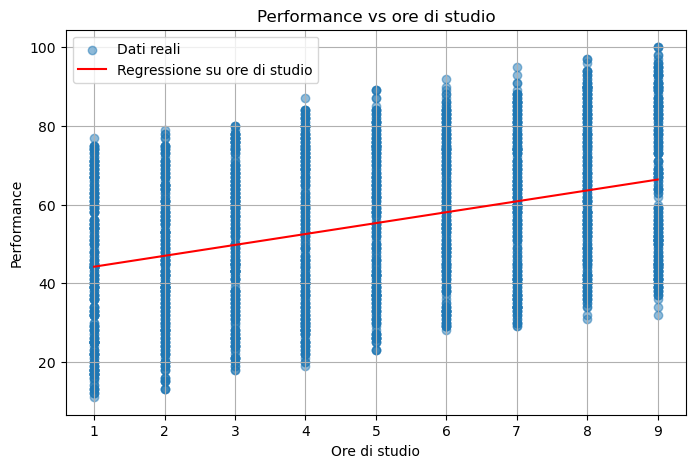

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test["Hours Studied"], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals, y_vals, color="red", label="Regressione su ore di studio")
plt.xlabel("Ore di studio")
plt.ylabel("Performance")
plt.title("Performance vs ore di studio")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
x_vals = np.linspace(X_test["Sleep Hours"].min(), X_test["Sleep Hours"].max(), 100)
X_input = np.column_stack((np.full_like(x_vals, study_mean), x_vals))
y_vals = model.predict(X_input)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


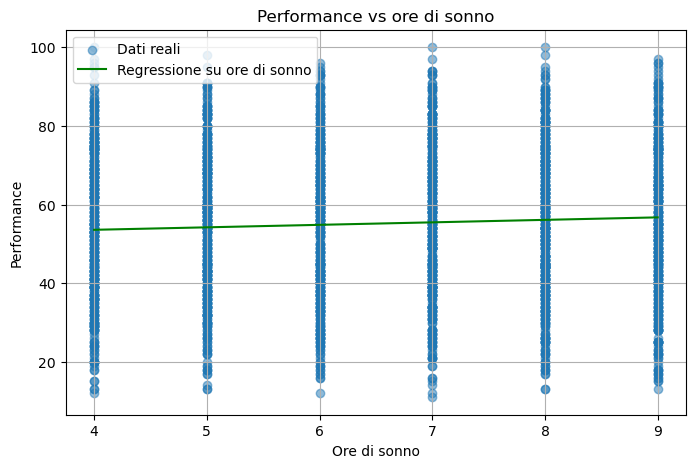

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test["Sleep Hours"], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals, y_vals, color="green", label="Regressione su ore di sonno")
plt.xlabel("Ore di sonno")
plt.ylabel("Performance")
plt.title("Performance vs ore di sonno")
plt.legend()
plt.grid(True)
plt.show()